In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-wisconsin-data/data.csv


# Getting the data and dividing the data int x and y for processing 

In [2]:
df = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')
df.drop(columns=['id', 'Unnamed: 32'], inplace=True)

df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

x = df.iloc[:, 2: -1].values
y = df['diagnosis'].values

# Exploring The data

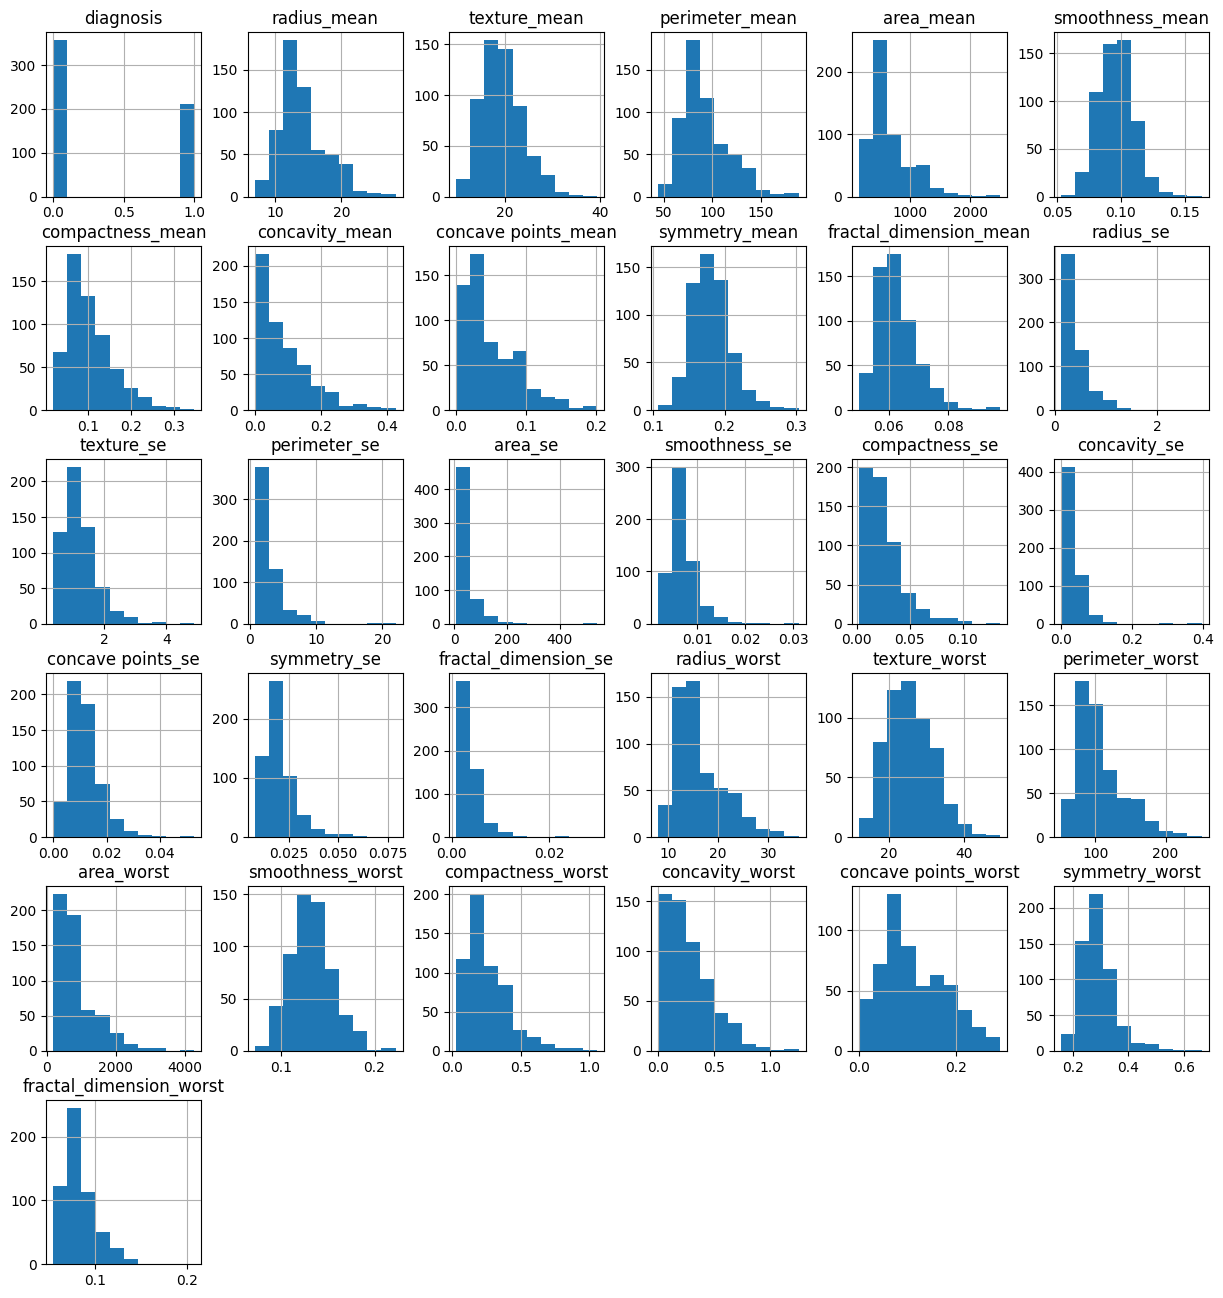

In [3]:
df.hist(figsize=(15 ,16))
plt.show()

In [4]:
df.skew()

diagnosis                  0.528461
radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1

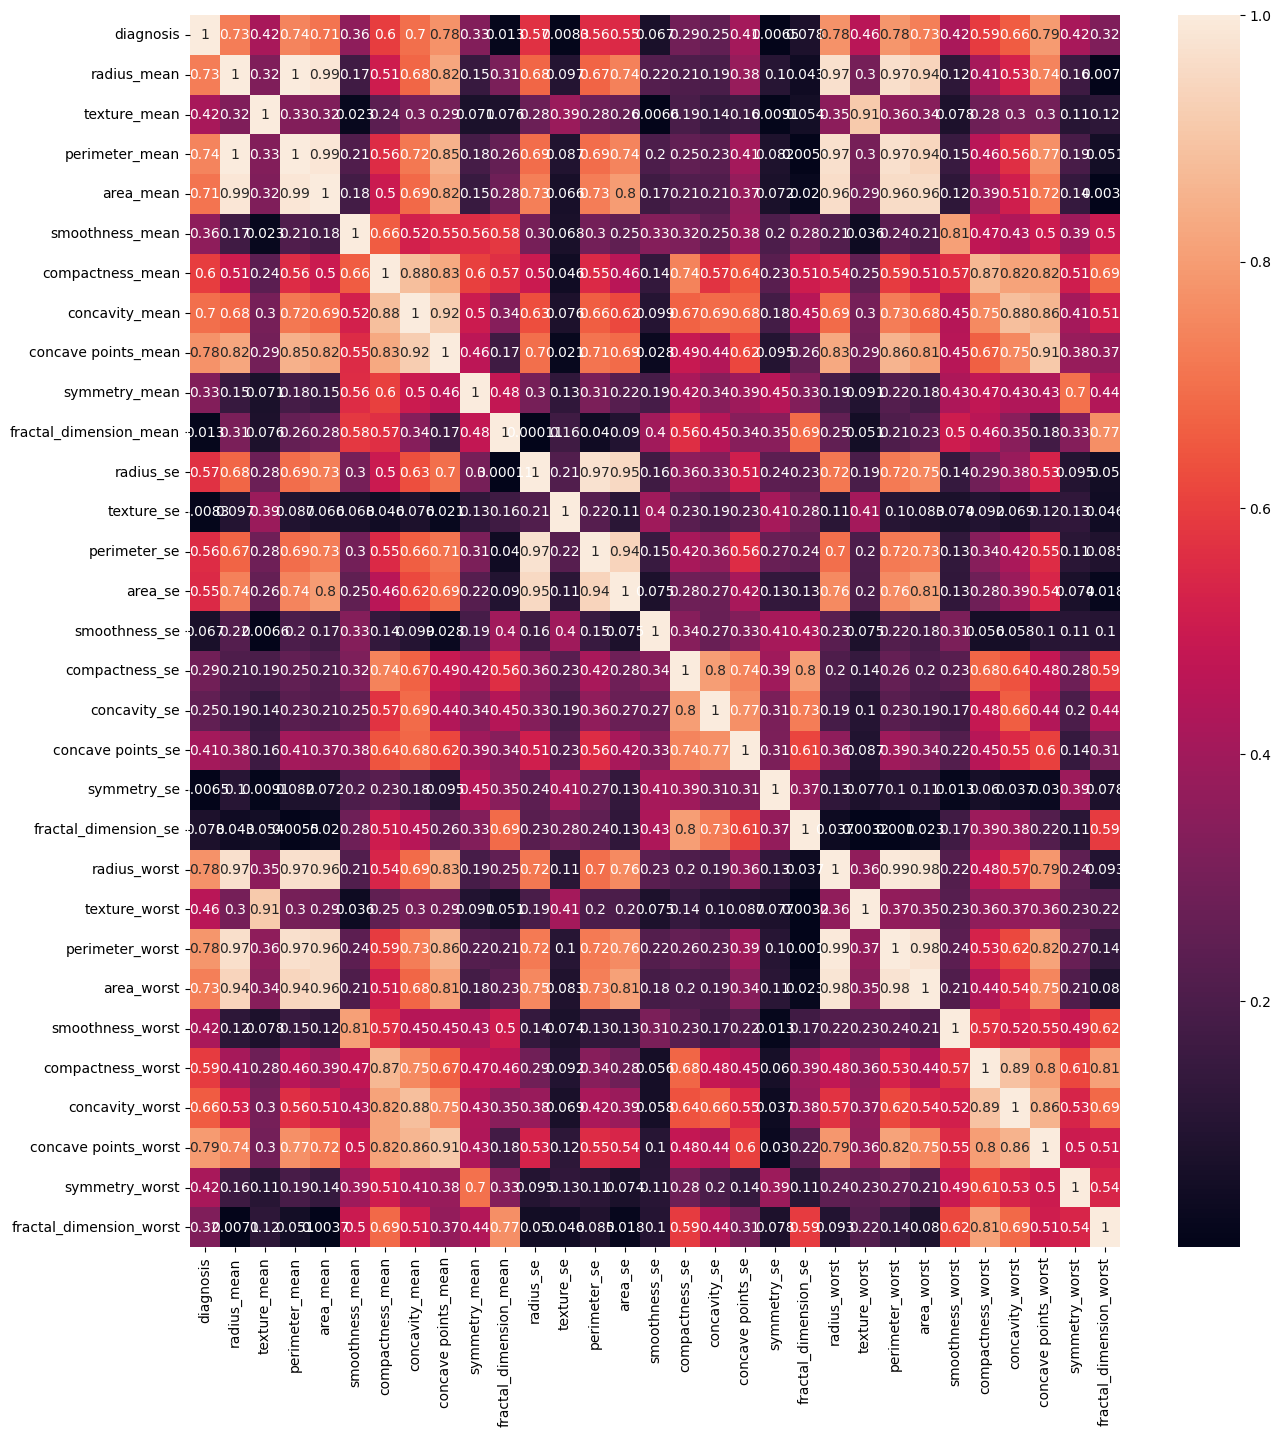

In [5]:
import seaborn as sns
plt.figure(figsize=(15, 16))
sns.heatmap(df.corr().abs(), annot=True)
plt.show()

# Dividing data into training and testing set

In [6]:
from sklearn.model_selection import train_test_split, cross_val_score

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size= 0.2)

# Feature Scaling 

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Logistics Regression Model

In [8]:
from sklearn.linear_model import LogisticRegression

logRe = LogisticRegression(max_iter = 5000)
logRe.fit(x_train, y_train)

y_pred = logRe.predict(x_test)

In [9]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

print(accuracy_score(y_pred, y_test))

score = cross_val_score(logRe, x, y, cv =5)
print(score)

[[65  2]
 [ 3 44]]
0.956140350877193
[0.93859649 0.94736842 0.98245614 0.92982456 0.95575221]


In [10]:
# Define hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  
    'solver': ['lbfgs', 'liblinear', 'saga', 'newton-cg'],
    'max_iter': [5000],
    'penalty': ['l1', 'l2', None]  # Note: 'l1' works only with 'liblinear' and 'saga'
}

# GridSearchCV
grid_search = GridSearchCV(logRe, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Parameters: {'C': 0.1, 'max_iter': 5000, 'penalty': 'l2', 'solver': 'liblinear'}
Best Accuracy: 0.9824175824175825


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
75 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

In [11]:
y_pred_logRe = grid_search.best_estimator_.predict(x_test)
print(classification_report(y_test, y_pred_logRe))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        67
           1       0.98      0.94      0.96        47

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



# SVC Model

In [22]:
from sklearn.svm import LinearSVC

lSvc = LinearSVC(max_iter =5000)
lSvc.fit(x_train, y_train)

y_pred = lSvc.predict(x_test)

In [23]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

print(accuracy_score(y_pred, y_test))

score = cross_val_score(lSvc, x, y, cv =5)
print(score)

[[64  3]
 [ 1 46]]
0.9649122807017544


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[0.86842105 0.94736842 0.92105263 0.92982456 0.9380531 ]


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [25]:
# Define the model with a higher max_iter
lSvc = LinearSVC(dual=False)  # dual=False is usually better for small datasets

# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'max_iter': [5000, 10000, 20000]  # Increase max_iter to allow proper convergence
}

# Perform Grid Search
grid_search = GridSearchCV(lSvc, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Print the best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Parameters: {'C': 0.01, 'max_iter': 5000}
Best Accuracy: 0.9824175824175825


In [26]:
y_pred_svc = grid_search.best_estimator_.predict(x_test)
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        67
           1       0.98      0.94      0.96        47

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



# Radnom Forest Model

In [18]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 200 ,max_depth=20, random_state=0)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [19]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

print(accuracy_score(y_pred, y_test))

score = cross_val_score(model, x, y, cv =10)
print(score)

[[64  3]
 [ 1 46]]
0.9649122807017544
[0.98245614 0.9122807  0.94736842 0.96491228 0.98245614 0.98245614
 0.94736842 0.98245614 0.94736842 1.        ]


In [20]:
param_grid = {
    'n_estimators': [50, 100, 200, 300, 400],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
grid_search = GridSearchCV(model, param_grid, cv= 10, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy: 0.9671014492753622


In [21]:
y_pred_rf = grid_search.best_estimator_.predict(x_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        67
           1       0.94      0.98      0.96        47

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114

